# Project: Wrangling and Analyze Data

This project focuses on the main fundamental concepts of data analysis which leads to a real application on real-time data. and this data is concerned about "WeLoveDogs" Tweets from [Twitter](https://x.com/)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import tweepy

%matplotlib inline

## Gathering

In [2]:
# Read Data into a Dataframe
df = pd.read_csv('./data/twitter-archive-enhanced.csv')

In [3]:
# Read data from the .tsv file
df_img = pd.read_csv('./data/image-predictions.tsv', sep='\t')

In [4]:
'''
# I've commented this out now that I've generated the file,
# it took 30+ minutes to run so no need to do it again!

# Import my Twitter API keys from separate file
%run twitter-api.py

# Use Twitter API to fetch metadata for tweet_ids
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID
# in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a
# .txt file
with open('data/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run
    # because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

# Extended tweet info from Twitter API
df_tweets = pd.read_json('./data/tweet-json.txt', lines=True)

In [5]:
# Read Data from a Dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [6]:
# Read Data from a Dataframe
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Read Data from a Dataframe
df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing

I intend to perform this assessment using programmatic and visual approaches. but Let's start with a visual assessment, Shall we?

In [8]:
# Assessing 'df' Dataframe
# I also used a spreadsheet software to access the df visually
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [9]:
# Get into about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [10]:
# Get summary statistics
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Get '20' Samples of the Dataframe
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,NaN,floofer,NaN,NaN
1763,678446151570427904,NaN,NaN,2015-12-20 05:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Touching scene here. Really stirs up the emoti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678446151...,10,10,NaN,NaN,NaN,NaN,NaN
1867,675334060156301312,NaN,NaN,2015-12-11 15:19:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,12,10,NaN,NaN,NaN,pupper,NaN
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,NaN,NaN,NaN
1191,717841801130979328,NaN,NaN,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717841801...,11,10,Barclay,NaN,NaN,NaN,NaN
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,NaN,NaN,NaN,NaN
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923...,11,10,NaN,NaN,NaN,NaN,NaN
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know everyone's excited for Christmas but th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763...,8,10,NaN,NaN,NaN,NaN,NaN
2130,670093938074779648,NaN,NaN,2015-11-27 04:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's a Flaccid Mitochondria. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670093938...,9,10,Wally,NaN,NaN,NaN,NaN
1703,680913438424612864,NaN,NaN,2015-12-27 00:49:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Griswold. He's dapper as hell. Already pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680913438...,11,10,Griswold,NaN,NaN,NaN,NaN


### Quick Observation:
We have a dataframe that consists of many data related to different tweets, each tweet is recorded with time and id, which means **No duplicates** are expected to be found.

We have many functional columns like:
* Dog Breeds Columns
* Dog names
* Rating Columns
* Tweet's text
* Tweet's Timestamp

Our main data is categorical, which means we're not expecting to perform many numerical analysis till now


In [12]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
# Check empty values
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [14]:
# Check Datatypes
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
# Working with names
df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune

In [16]:
# Check names whose length is than 3 characters long
df[df['name'].str.len() < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,NaN,NaN,NaN,NaN
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,NaN,NaN,NaN
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,NaN,NaN,NaN
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,NaN,NaN,NaN,NaN
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN


In [17]:
# Check for names that doesn't start with an Uppercase
df[df['name'].str.islower() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,NaN,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,NaN,NaN,NaN,NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,NaN,NaN,NaN,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,NaN,NaN,NaN,NaN
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN


In [18]:
# Working with 'Dog breeds'
print(df['doggo'].unique())
print(df['floofer'].unique())
print(df['pupper'].unique())
print(df['puppo'].unique())

[nan 'doggo']
[nan 'floofer']
[nan 'pupper']
[nan 'puppo']


In [19]:
# Check null values in 'Dog breeds'
df[df['floofer'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,NaN,floofer,NaN,NaN
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,NaN,NaN
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,NaN,floofer,NaN,NaN
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,NaN,NaN,floofer,NaN,NaN
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,NaN,floofer,NaN,NaN
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,NaN,NaN,floofer,NaN,NaN
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,NaN,NaN,floofer,NaN,NaN
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,NaN,floofer,NaN,NaN
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,NaN,NaN,floofer,NaN,NaN
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,NaN,floofer,NaN,NaN


In [20]:
# Working the 'df_img' Dataframe
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
# Get info on the dataframe
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Get summary statistics
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# Check Duplicates
df_img.duplicated().sum()

np.int64(0)

In [24]:
# Check Null values
df_img.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
# Get columns of p1 is a True
df_img[df_img['p1_dog'] == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [26]:
# Check long imgs
df_img[df_img['img_num'] == 2]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2048,886983233522544640,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2,Chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [27]:
# Check duplicated ids
len(df_img['tweet_id'].unique())

2075

In [28]:
# Check False Values
df_img[df_img['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [29]:
# Check False Values
df_img[df_img['p2_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [30]:
# Check False Values
df_img[df_img['p3_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [31]:
# Check for p2_conf higher than p1_conf
df_img[df_img['p3_conf'] > df_img['p1_conf']]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
df_img[df_img['p2_conf'] > df_img['p1_conf']]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
# Check for when the p1_dog is False and p2_dog is True
df_img[(df_img['p1_dog'] == False) & (df_img['p2_dog'] == True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True


In [34]:
# Working with df_tweets
df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [35]:
# Get info on Dataframe
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [36]:
# Get summary statistics
df_tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [37]:
# Check null values
df_tweets.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

### Assessment Report:
By performing visual and programmatic assessment, here's the following results:

**Quality**

Completeness
- Many missing values in `in_reply_to_status_id`, `in_reply_to_user_id`, `in_reply_to_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`, `puppo`, `pupper`, `name`, `expanded_urls`
- `names` are collected from the `text` columns where the dog breed column is filled only if it's mentioned in the tweet, the `name` is filled when the name is in the tweet
- The `contributors`, `coordinates`, and `geo` have missing data

Uniqueness
- No duplicates found

Validity
- `timestamp`, `created_at` is supposed to be `datetime[ns]`
- `id` columns should be `object`
- `name` found is wrong in the tweet
- `p1 ... p3` are not very high when `p1` is of a dog
- Some columns contain JSON data (e.g. `entities`)

Accuracy
- `name` found the dogs to have less than 3 characters as the name
- `rating` numerator doesn't seem to be accurate
- `img_num` has a number of `2` in a single img
- `p1*` isn't so accurate

Inconsistency
- `name` found inconsistent name patterns
- `p1 ... p3` columns are found in different name patterns in underscores

**Tidiness Issues**
- `text` column has information about `rating`, `expanded_urls`

## Cleaning

We're required to access and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

**Quality Issues**

* Indexes on the three datasets don't match.
* Empty and unneeded columns should be eliminated
* Datatypes need to be corrected
* Some images don't have images and ratings
* For simplicity, dog stages must be merged in one column
* The existing numerator/denominator don't seem to be very accurate.
* Image predictions doesn't have inconsistent cases (uppercase and lowercase)
* Image predictions must be in one column

**Tidiness Issues**
* A single, merged dataframe must be merged.
* text has information about rating, expanded_urls

### Quality Issue: Change Indexes

**Define**

All dataset like `df` and `df_img` have the same name unlike `df_tweets`. Setting the index to the same value for the three datasets will make merging and combining easier and reduce the errors.

**Code**

In [38]:
# Renaming the df_tweets `id` to `tweet_id` to match the other dataframes
df_tweets.rename(columns={'id': 'tweet_id'}, inplace=True)

In [39]:
# Now all of the dataframes share a tweet_id column so make that the index
df.set_index('tweet_id', inplace=True)
df_img.set_index('tweet_id', inplace=True)
df_tweets.set_index('tweet_id', inplace=True)

**Test**

In [40]:
print(df.index.name)
print(df_img.index.name)
print(df_tweets.index.name)

tweet_id
tweet_id
tweet_id


### Tidiness Issue: Merge the three different datasets into one big dataframe

**Define**

Now that they all share the same index, I can now merge the three datasets into one big dataframe. This may result in some issues that must be cleaned.

**Code**

In [41]:
# Merge the 'df' with 'df_img'
df_clean = df.join(df_img, how="inner")

# Join the 'df_clean' with 'df_tweets'
df_clean = df_clean.join(df_tweets, how="inner", lsuffix="_x")

In [42]:
# Test Case
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   in_reply_to_status_id_x        23 non-null     float64            
 1   in_reply_to_user_id_x          23 non-null     float64            
 2   timestamp                      2073 non-null   object             
 3   source_x                       2073 non-null   object             
 4   text                           2073 non-null   object             
 5   retweeted_status_id            79 non-null     float64            
 6   retweeted_status_user_id       79 non-null     float64            
 7   retweeted_status_timestamp     79 non-null     object             
 8   expanded_urls                  2073 non-null   object             
 9   rating_numerator               2073 non-null   int64              
 10

In [43]:
# Drop columns which has a suffix with '_x'
df_clean.drop(columns=[col for col in df_clean.columns if '_x' in col], inplace=True)

**Test**

In [44]:
# Test Case
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   timestamp                      2073 non-null   object             
 1   text                           2073 non-null   object             
 2   retweeted_status_id            79 non-null     float64            
 3   retweeted_status_user_id       79 non-null     float64            
 4   retweeted_status_timestamp     79 non-null     object             
 5   expanded_urls                  2073 non-null   object             
 6   rating_numerator               2073 non-null   int64              
 7   rating_denominator             2073 non-null   int64              
 8   name                           1496 non-null   object             
 9   doggo                          80 non-null     object             
 10

### Quality Issue: Remove empty and unneeded columns

**Define**

In the instructions, they said that the retweets aren't needed. Looking at the dataset, I see the `retweeted_status_id` isn't needed and other columns are empty

**Code**

In [45]:
# Get name of columns that have Null values more than 75% of rows count
df_clean.isnull().sum()

timestamp                           0
text                                0
retweeted_status_id              1994
retweeted_status_user_id         1994
retweeted_status_timestamp       1994
expanded_urls                       0
rating_numerator                    0
rating_denominator                  0
name                              577
doggo                            1993
floofer                          2065
pupper                           1852
puppo                            2049
jpg_url                             0
img_num                             0
p1                                  0
p1_conf                             0
p1_dog                              0
p2                                  0
p2_conf                             0
p2_dog                              0
p3                                  0
p3_conf                             0
p3_dog                              0
created_at                          0
id_str                              0
full_text   

In [46]:
# Drop unneeded columns
df_clean = df_clean.drop(df_clean.filter(regex='retweeted_status').columns, axis=1)
df_clean = df_clean.drop(df_clean.filter(regex='in_reply_to_').columns, axis=1)
df_clean = df_clean.drop(df_clean.filter(regex='quoted_status').columns, axis=1)

In [47]:
# Drop the null columns
df_clean.drop([
    'contributors', 'coordinates', 'display_text_range', 'geo', 'place',
    'id_str', 'truncated', 'possibly_sensitive',
    'possibly_sensitive_appealable', 'favorited', 'retweeted', 'entities',
    'extended_entities', 'is_quote_status', 'source'], axis=1, inplace=True)

**Test**

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   object             
 1   text                2073 non-null   object             
 2   expanded_urls       2073 non-null   object             
 3   rating_numerator    2073 non-null   int64              
 4   rating_denominator  2073 non-null   int64              
 5   name                1496 non-null   object             
 6   doggo               80 non-null     object             
 7   floofer             8 non-null      object             
 8   pupper              221 non-null    object             
 9   puppo               24 non-null     object             
 10  jpg_url             2073 non-null   object             
 11  img_num             2073 non-null   int64              
 12  p1      

### Quality Issue: Correct data types

**Define**

I noticed that the `timestamp` column is of the wrong datatype and it should be a `datetime[ns]`

**Code**

In [49]:
# Convert datatype of `timestamp` into `datetime[ns]`
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

**Test**

In [50]:
# Test case
df_clean.timestamp.dtype

datetime64[ns, UTC]

### Quality Issue: Make sure all tweets have images and ratings

**Define**

According to the instructions, "You only want original ratings (no retweets) that have images, and not all are dog ratings and some are retweets.

**Code**

In [51]:
# Check if there's any imgs
df_clean[df_clean['jpg_url'].isnull() == True]['jpg_url'].count()

np.int64(0)

In [52]:
# Check if there's any denominators missing
df_clean[df_clean['rating_denominator'].isnull() == True]['rating_denominator'].count()

np.int64(0)

In [53]:
# Check if there's any rating denominator == 0
# I assume there's some numerators might be 0
df_clean.query('rating_denominator == 0')['rating_denominator'].sum()

np.int64(0)

**Test**

Since we already dropped retweets columns above. and the number of columns exist above. We've solved this issue

### Quality Issue: Check Doggie stage columns spread

**Define**

They use four stages in their classification `doggo` `floofer` `pupper` and `puppo`. We'll unify them in one column to be easy for analysis.

**Code**

In [54]:
# Testing columns if they have more than one type
df_clean[(df_clean['doggo'] == 'doggo') & (df_clean['pupper'] == 'pupper')]

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_dog,p3,p3_conf,p3_dog,created_at,full_text,user,retweet_count,favorite_count,lang
tweet_id,,,,,,,,,,,,,,,,,,,,,
817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,NaN,pupper,NaN,...,True,Irish_water_spaniel,0.029769,True,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...","{'id': 4196983835, 'id_str': '4196983835', 'na...",3084,11901,en
808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,NaN,pupper,NaN,...,True,Great_Pyrenees,0.126482,True,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2525,9701,en
802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,NaN,pupper,NaN,...,True,Rhodesian_ridgeback,0.012061,True,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...","{'id': 4196983835, 'id_str': '4196983835', 'na...",1573,7039,en
801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,NaN,pupper,NaN,...,True,bluetick,0.021953,True,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2429,8992,en
785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN,...,False,echidna,0.005442,False,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2561,8735,en
775898661951791106,2016-09-14 03:27:11+00:00,"RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,NaN,pupper,NaN,...,True,doormat,0.003956,False,2016-09-14 03:27:11+00:00,"RT @dog_rates: Like father (doggo), like son (...","{'id': 4196983835, 'id_str': '4196983835', 'na...",17621,0,en
770093767776997377,2016-08-29 03:00:36+00:00,RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN,...,True,kelpie,0.035711,True,2016-08-29 03:00:36+00:00,RT @dog_rates: This is just downright precious...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",3520,0,en
759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,NaN,pupper,NaN,...,True,kuvasz,0.001752,True,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...","{'id': 4196983835, 'id_str': '4196983835', 'na...",2173,6620,en
751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,NaN,pupper,NaN,...,False,snow_leopard,0.013876,False,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1265,4849,en


In [55]:
# Replace all null values with empty spaces
df_clean['doggo'].fillna('', inplace=True)
df_clean['floofer'].fillna('', inplace=True)
df_clean['pupper'].fillna('', inplace=True)
df_clean['puppo'].fillna('', inplace=True)

# Make the new column
df_clean['dog_stage'] = df_clean['doggo'] + df_clean['floofer'] + df_clean['pupper'] + df_clean['puppo']

C:\Users\MoSTa\AppData\Local\Temp\ipykernel_59044\1560438839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['doggo'].fillna('', inplace=True)
C:\Users\MoSTa\AppData\Local\Temp\ipykernel_59044\1560438839.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [56]:
# Working with values of this column
df_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [57]:
# Separate columns that have multiple values joined together with ','
df_clean['dog_stage'] = df_clean['dog_stage'].replace({
    'doggopupper': 'doggo,pupper',
    'doggopuppo': 'doggo,puppo',
    'doggofloofer': 'doggo,floofer'
})

**Test**

In [58]:
# Test case
df_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [59]:
# Test case
df_clean.value_counts('dog_stage')

dog_stage
                 1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: count, dtype: int64

In [60]:
# Test case
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   datetime64[ns, UTC]
 1   text                2073 non-null   object             
 2   expanded_urls       2073 non-null   object             
 3   rating_numerator    2073 non-null   int64              
 4   rating_denominator  2073 non-null   int64              
 5   name                1496 non-null   object             
 6   doggo               2073 non-null   object             
 7   floofer             2073 non-null   object             
 8   pupper              2073 non-null   object             
 9   puppo               2073 non-null   object             
 10  jpg_url             2073 non-null   object             
 11  img_num             2073 non-null   int64              
 12  p1      

In [61]:
# Drop old dog_stage unnecessary columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [62]:
# Test case
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   datetime64[ns, UTC]
 1   text                2073 non-null   object             
 2   expanded_urls       2073 non-null   object             
 3   rating_numerator    2073 non-null   int64              
 4   rating_denominator  2073 non-null   int64              
 5   name                1496 non-null   object             
 6   jpg_url             2073 non-null   object             
 7   img_num             2073 non-null   int64              
 8   p1                  2073 non-null   object             
 9   p1_conf             2073 non-null   float64            
 10  p1_dog              2073 non-null   bool               
 11  p2                  2073 non-null   object             
 12  p2_conf 

### Quality Issue: Make a new rating column

**Define**

The numerator is larger than the denominator. and this is wrong in presentation. We can't make a new rating system. but we can use a new format like the decimal numering system. I also noticed in the visual assessment that they have issues so I will try to get them from the `text` column.

**Code**

In [63]:
# Get `text`, `rating_numerator`, `rating_denominator`
df_clean[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
tweet_id,,,
892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10
892177421306343426,This is Tilly. She's just checking pup on you....,13,10
891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10
891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10
891327558926688256,This is Franklin. He would like you to stop ca...,12,10
...,...,...,...
666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10
666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10
666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10


In [64]:
# Check wrong denominator
df['rating_denominator'].value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [65]:
# Check wrong numerator
df['rating_numerator'].value_counts()

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: count, dtype: int64

In [66]:
# Create a new column `rating` that is equal to num / den
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

**Test**

In [67]:
# Check new column
df_clean['rating']

tweet_id
892420643555336193    1.3
892177421306343426    1.3
891815181378084864    1.2
891689557279858688    1.3
891327558926688256    1.2
                     ... 
666049248165822465    0.5
666044226329800704    0.6
666033412701032449    0.9
666029285002620928    0.7
666020888022790149    0.8
Name: rating, Length: 2073, dtype: float64

In [68]:
# Get summary statistics
df_clean['rating'].describe()

count    2073.000000
mean        1.169987
std         3.988880
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

### Quality Issue: Image predictions have inconsistent cases

**Define**

I see that the image prediction strings are mixed-case (some begin with capital letters, others with lowercase). I'm going to fix this by converting them all to lowercase.

**Code**

In [69]:
# Convert p1, p2, p3 columns to lowercase
for col in ['p1', 'p2', 'p3']:
    df_clean[col] = df_clean[col].str.lower()

**Test**

In [70]:
df_clean['p1'].value_counts().head()

p1
golden_retriever      150
labrador_retriever    100
pembroke               88
chihuahua              83
pug                    57
Name: count, dtype: int64

In [71]:
df_clean['p2'].value_counts().head()

p2
labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
Name: count, dtype: int64

In [72]:
df_clean['p3'].value_counts().head()

p3
labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
Name: count, dtype: int64

### Quality Issue: Image prediction are spread accross 3 columns and should be in a single column

**Define**

Let's take a look at the image predictions. Here's how the columns are described:

* `p1` is the algorithm's #1 prediction for the image in the tweet → **golden retriever**
* `p1_conf` is how confident the algorithm is in its #1 prediction → **95%**
* `p1_dog` is whether or not the #1 prediction is a breed of dog → **TRUE**
* `p2` is the algorithm's second most likely prediction → **Labrador retriever**
* `p2_conf` is how confident the algorithm is in its #2 prediction → **1%**
* `p2_dog` is whether or not the #2 prediction is a breed of dog → **TRUE**
* etc.

We'll probably need to pick a confidence level, let's take a look at the ranges.

**Code**

In [73]:
# Create a new column called breed based on the greatest algorithm confidence
def get_breed(row):
    max_conf = max(row['p1_conf'], row['p2_conf'], row['p3_conf'])
    if row['p1_dog'] and max_conf == row['p1_conf']:
        return row['p1']
    elif row['p2_dog'] and max_conf == row['p2_conf']:
        return row['p2']
    elif row['p3_dog'] and max_conf == row['p3_conf']:
        return row['p3']
    else:
        return None

# Apply the function to the dataframe
df_clean['breed'] = df_clean.apply(get_breed, axis=1)


In [74]:
df_clean.drop(['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3','p3_dog', 'p3_conf'], axis=1, inplace=True)

**Test**

In [75]:
df_clean.head()

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,created_at,full_text,user,retweet_count,favorite_count,lang,dog_stage,rating,breed
tweet_id,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8853,39467,en,,1.3,None
892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,"{'id': 4196983835, 'id_str': '4196983835', 'na...",6514,33819,en,,1.3,chihuahua
891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4328,25461,en,,1.2,chihuahua
891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8964,42908,en,,1.3,None
891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",9774,41048,en,,1.2,basset


In [76]:
df_clean['breed'].value_counts()

breed
golden_retriever      150
labrador_retriever    100
pembroke               88
chihuahua              83
pug                    57
                     ... 
scotch_terrier          1
entlebucher             1
japanese_spaniel        1
standard_schnauzer      1
clumber                 1
Name: count, Length: 111, dtype: int64

In [77]:
df_clean['breed'].isnull().sum()

np.int64(542)

In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   datetime64[ns, UTC]
 1   text                2073 non-null   object             
 2   expanded_urls       2073 non-null   object             
 3   rating_numerator    2073 non-null   int64              
 4   rating_denominator  2073 non-null   int64              
 5   name                1496 non-null   object             
 6   jpg_url             2073 non-null   object             
 7   img_num             2073 non-null   int64              
 8   created_at          2073 non-null   datetime64[ns, UTC]
 9   full_text           2073 non-null   object             
 10  user                2073 non-null   object             
 11  retweet_count       2073 non-null   int64              
 12  favorite

### Quality Issue: Missing names

Now after the cleaning phase, Here's what we ended up with

In [79]:
# Get info about data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   datetime64[ns, UTC]
 1   text                2073 non-null   object             
 2   expanded_urls       2073 non-null   object             
 3   rating_numerator    2073 non-null   int64              
 4   rating_denominator  2073 non-null   int64              
 5   name                1496 non-null   object             
 6   jpg_url             2073 non-null   object             
 7   img_num             2073 non-null   int64              
 8   created_at          2073 non-null   datetime64[ns, UTC]
 9   full_text           2073 non-null   object             
 10  user                2073 non-null   object             
 11  retweet_count       2073 non-null   int64              
 12  favorite

In [80]:
# Check names percentage to know if We can remove null values
df_clean['name'].isnull().sum() / len(df_clean)

np.float64(0.2783405692233478)

In [81]:
# Get names with length smaller than two characters
df_clean[(df_clean['name'].str.len() < 3)]['name'].unique()

array(['a', 'Mo', 'Bo', 'an', 'O', 'Al', 'my', 'by', 'Ed', 'JD', 'Jo'],
      dtype=object)

In [82]:
# Replace 'a', 'an', 'O', 'my', 'by', 'such', 'officially' with null
df_clean['name'].replace(['a', 'an', 'O', 'my', 'by', 'such', 'officially'], np.nan, inplace=True)

In [83]:
df_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley',
       'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey',
 

In [84]:
# Get the most repeated name
df_clean['name'].value_counts()

name
Charlie       11
Tucker        10
Cooper        10
Oliver        10
Penny         10
              ..
Lilli          1
Boston         1
Brandonald     1
Corey          1
Christoper     1
Name: count, Length: 928, dtype: int64

In [85]:
# Replace Null values with 'Charlie'
df_clean['name'].fillna('Charlie', inplace=True)

In [86]:
# Test Case
df_clean['name'].isnull().sum()

np.int64(0)

In [87]:
# Test case
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   datetime64[ns, UTC]
 1   text                2073 non-null   object             
 2   expanded_urls       2073 non-null   object             
 3   rating_numerator    2073 non-null   int64              
 4   rating_denominator  2073 non-null   int64              
 5   name                2073 non-null   object             
 6   jpg_url             2073 non-null   object             
 7   img_num             2073 non-null   int64              
 8   created_at          2073 non-null   datetime64[ns, UTC]
 9   full_text           2073 non-null   object             
 10  user                2073 non-null   object             
 11  retweet_count       2073 non-null   int64              
 12  favorite

### Tidiness Issue: Make a new "Social Total" Column

I'm going to be looking at the patterns of retweets and favorites for individual tweets, so I'll create a new combined derived column called `social_total` that equals the sum of `favorite_count` and `retweet_count` so I don't need to keep having to perform this arithmetic.

In [88]:
df_clean['favorite_count'].head()

tweet_id
892420643555336193    39467
892177421306343426    33819
891815181378084864    25461
891689557279858688    42908
891327558926688256    41048
Name: favorite_count, dtype: int64

In [89]:
df_clean['retweet_count'].head()

tweet_id
892420643555336193    8853
892177421306343426    6514
891815181378084864    4328
891689557279858688    8964
891327558926688256    9774
Name: retweet_count, dtype: int64

In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   datetime64[ns, UTC]
 1   text                2073 non-null   object             
 2   expanded_urls       2073 non-null   object             
 3   rating_numerator    2073 non-null   int64              
 4   rating_denominator  2073 non-null   int64              
 5   name                2073 non-null   object             
 6   jpg_url             2073 non-null   object             
 7   img_num             2073 non-null   int64              
 8   created_at          2073 non-null   datetime64[ns, UTC]
 9   full_text           2073 non-null   object             
 10  user                2073 non-null   object             
 11  retweet_count       2073 non-null   int64              
 12  favorite

In [91]:
df_clean['social_total'] = df_clean['favorite_count'] + df_clean['retweet_count']

In [92]:
df_clean['social_total'].head()

tweet_id
892420643555336193    48320
892177421306343426    40333
891815181378084864    29789
891689557279858688    51872
891327558926688256    50822
Name: social_total, dtype: int64

## Storing

Now that the Cleaning phase is finished. We have to put our results in a new CSV file and put it in a new dataframe to move onto the next phase.

In [93]:
df_clean.head()

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,created_at,full_text,user,retweet_count,favorite_count,lang,dog_stage,rating,breed,social_total
tweet_id,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8853,39467,en,,1.3,None,48320
892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,"{'id': 4196983835, 'id_str': '4196983835', 'na...",6514,33819,en,,1.3,chihuahua,40333
891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4328,25461,en,,1.2,chihuahua,29789
891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8964,42908,en,,1.3,None,51872
891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",9774,41048,en,,1.2,basset,50822


In [94]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   datetime64[ns, UTC]
 1   text                2073 non-null   object             
 2   expanded_urls       2073 non-null   object             
 3   rating_numerator    2073 non-null   int64              
 4   rating_denominator  2073 non-null   int64              
 5   name                2073 non-null   object             
 6   jpg_url             2073 non-null   object             
 7   img_num             2073 non-null   int64              
 8   created_at          2073 non-null   datetime64[ns, UTC]
 9   full_text           2073 non-null   object             
 10  user                2073 non-null   object             
 11  retweet_count       2073 non-null   int64              
 12  favorite

In [95]:
df_clean.describe()

,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count,rating,social_total
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,12.265798,10.511819,1.203570,2976.089243,8556.718283,1.169987,11532.807525
std,40.699924,7.180517,0.561856,5054.897526,12098.640994,3.988880,16389.509182
min,0.000000,2.000000,1.000000,16.000000,0.000000,0.000000,23.000000
25%,10.000000,10.000000,1.000000,634.000000,1674.000000,1.000000,2658.000000
50%,11.000000,10.000000,1.000000,1408.000000,3864.000000,1.100000,5496.000000
75%,12.000000,10.000000,1.000000,3443.000000,10937.000000,1.200000,14292.000000
max,1776.000000,170.000000,4.000000,79515.000000,132810.000000,177.600000,210590.000000


In [96]:
# Put the df_clean into a new CSV file
df_clean.to_csv('./data/twitter_archive_master.csv')

## Analysis and Visualization

The project requires us to provide **at least three (3) insights** and **one (1) visualization**.

In [97]:
# Print the head
df_2 = pd.read_csv('./data/twitter_archive_master.csv')

In [98]:
# Get info on the columns
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   timestamp           2073 non-null   object 
 2   text                2073 non-null   object 
 3   expanded_urls       2073 non-null   object 
 4   rating_numerator    2073 non-null   int64  
 5   rating_denominator  2073 non-null   int64  
 6   name                2073 non-null   object 
 7   jpg_url             2073 non-null   object 
 8   img_num             2073 non-null   int64  
 9   created_at          2073 non-null   object 
 10  full_text           2073 non-null   object 
 11  user                2073 non-null   object 
 12  retweet_count       2073 non-null   int64  
 13  favorite_count      2073 non-null   int64  
 14  lang                2073 non-null   object 
 15  dog_stage           320 non-null    object 
 16  rating

In [99]:
# Get summary statistics
df_2.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count,rating,social_total
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,7.383634e+17,12.265798,10.511819,1.203570,2976.089243,8556.718283,1.169987,11532.807525
std,6.780118e+16,40.699924,7.180517,0.561856,5054.897526,12098.640994,3.988880,16389.509182
min,6.660209e+17,0.000000,2.000000,1.000000,16.000000,0.000000,0.000000,23.000000
25%,6.764706e+17,10.000000,10.000000,1.000000,634.000000,1674.000000,1.000000,2658.000000
50%,7.119681e+17,11.000000,10.000000,1.000000,1408.000000,3864.000000,1.100000,5496.000000
75%,7.931959e+17,12.000000,10.000000,1.000000,3443.000000,10937.000000,1.200000,14292.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,79515.000000,132810.000000,177.600000,210590.000000


### **Insight #1: What is the overall distribution of tweet engagement metrics (favorites and retweets)?**

In [100]:
# What is the overall distribution of tweet engagement metrics (favorites and retweets)?
df_2[['favorite_count', 'retweet_count']].describe()

,favorite_count,retweet_count
count,2073.000000,2073.000000
mean,8556.718283,2976.089243
std,12098.640994,5054.897526
min,0.000000,16.000000
25%,1674.000000,634.000000
50%,3864.000000,1408.000000
75%,10937.000000,3443.000000
max,132810.000000,79515.000000


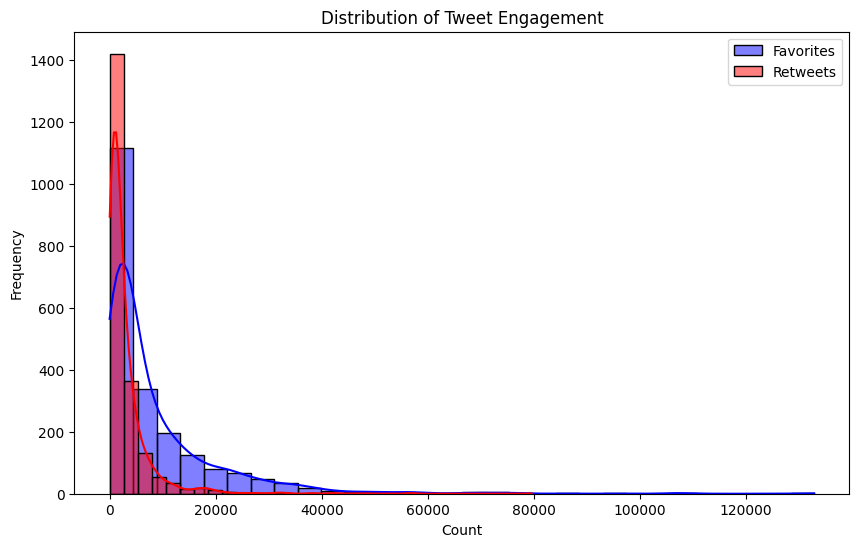

In [101]:
# Adjust the plot size
plt.figure(figsize=(10, 6))

# Create the two plots
sns.histplot(df_2['favorite_count'], bins=30, kde=True, color='blue', label='Favorites')
sns.histplot(df_2['retweet_count'], bins=30, kde=True, color='red', label='Retweets')

# Customize the plot's labels
plt.legend()
plt.title('Distribution of Tweet Engagement')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Conclusion**

- The distribution of both favorites and retweets is heavily right-skewed. This means that most tweets receive a relatively low number of favorites and retweets, while a few tweets receive a very high number of engagements.
- The majority of tweets have fewer than **10,000 favorites and retweets**, with a sharp drop-off as the counts increase.
- There are a few tweets with extremely high engagement **(up to around 120,000 favorites)**, indicating viral tweets that gain exceptional attention.

### **Insight #2: How are the different dog stages (dog_stage) represented in the dataset?**

In [102]:
# Count the occurrences of each dog stage
dog_stage_counts = df_2['dog_stage'].value_counts()

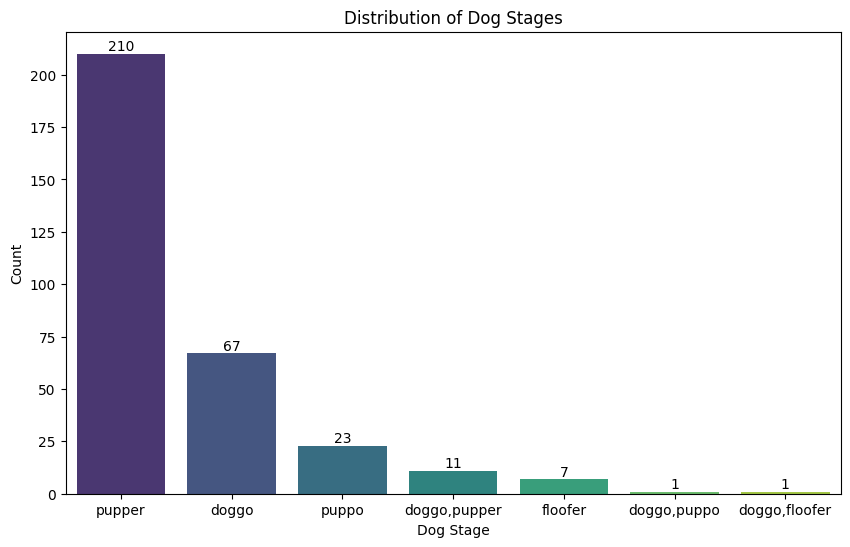

In [103]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=dog_stage_counts.index, y=dog_stage_counts.values, hue=dog_stage_counts.index, palette="viridis")

# Customize the plot's labels
plt.title('Distribution of Dog Stages')
plt.xlabel('Dog Stage')
plt.ylabel('Count')

# Add labels with numbers
for i, count in enumerate(dog_stage_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

**Conclusion**

The "pupper" stage is the most frequently mentioned with 210 occurrences, followed by "doggo" with 67, indicating a strong preference for younger and adult dogs. Stages like "puppo" (23), "doggo, pupper" (11), and "floofer" (7) are much rarer. Combined stages such as "doggo, puppo" and "doggo, floofer" are extremely rare, with only 1 mention each. The high frequency of "pupper" and "doggo" stages suggests these tweets generate more engagement. Diversifying content to include less common stages could attract more varied audience engagement. This understanding helps tailor content strategy for maximum follower interaction.

### **Insight #3: What are the most frequently mentioned dog breeds and how do they correlate with tweet engagement?**

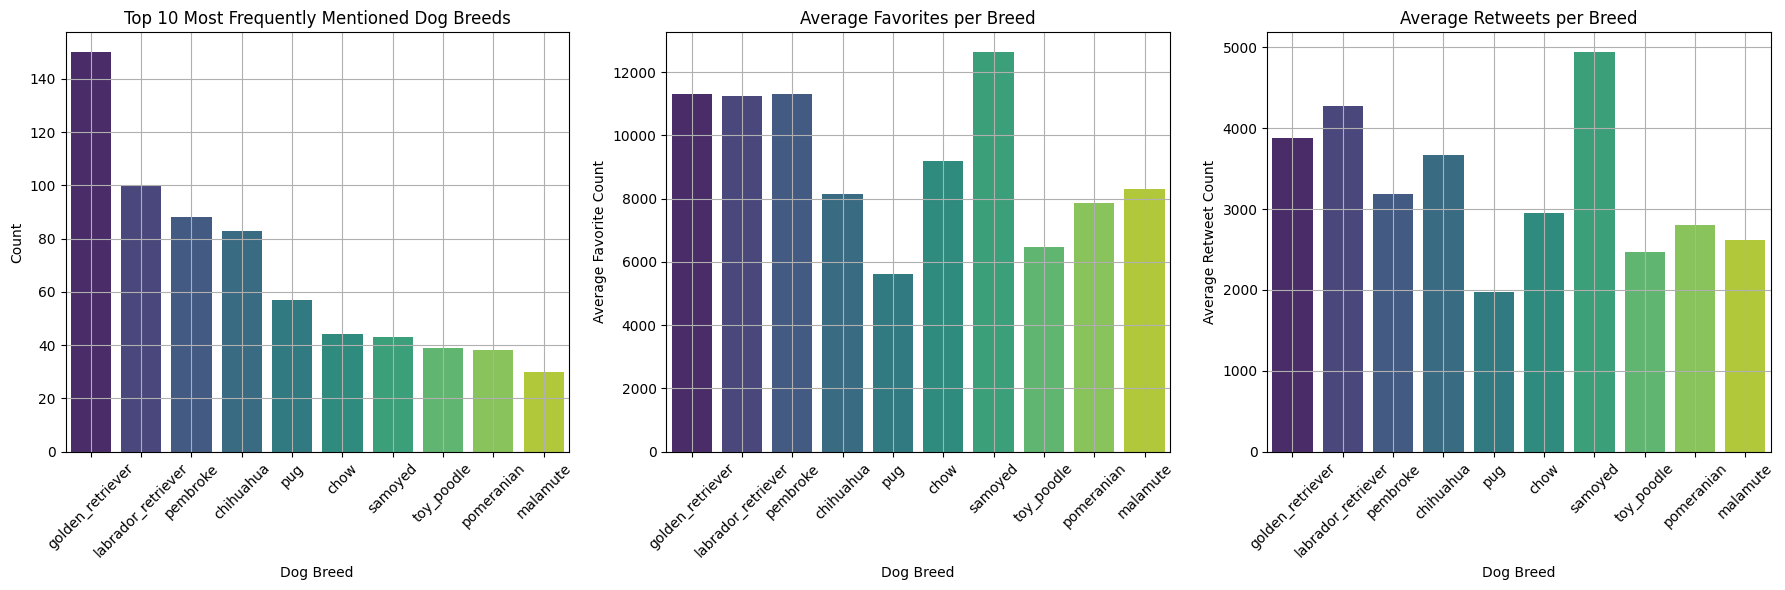

In [104]:
# Filter out rows with missing breed information
df_breeds = df_clean.dropna(subset=['breed'])

# Count the occurrences of each breed
breed_counts = df_breeds['breed'].value_counts().head(10)  # Get the top 10 most frequently mentioned breeds

# Calculate average engagement for each breed
average_engagement = df_breeds.groupby('breed')[['favorite_count', 'retweet_count']].mean().loc[breed_counts.index]

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot the most frequently mentioned breeds
sns.barplot(x=breed_counts.index, y=breed_counts.values, palette="viridis", hue=breed_counts.index, dodge=False, ax=axs[0])
axs[0].set_title('Top 10 Most Frequently Mentioned Dog Breeds')
axs[0].set_xlabel('Dog Breed')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend([], [], frameon=False)
axs[0].grid(True)

# Plot the average favorites per breed
sns.barplot(x=average_engagement.index, y=average_engagement['favorite_count'], palette="viridis", hue=average_engagement.index, dodge=False, ax=axs[1])
axs[1].set_title('Average Favorites per Breed')
axs[1].set_xlabel('Dog Breed')
axs[1].set_ylabel('Average Favorite Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend([], [], frameon=False)
axs[1].grid(True)

# Plot the average retweets per breed
sns.barplot(x=average_engagement.index, y=average_engagement['retweet_count'], palette="viridis", hue=average_engagement.index, dodge=False, ax=axs[2])
axs[2].set_title('Average Retweets per Breed')
axs[2].set_xlabel('Dog Breed')
axs[2].set_ylabel('Average Retweet Count')
axs[2].tick_params(axis='x', rotation=45)
axs[2].legend([], [], frameon=False)
axs[2].grid(True)

plt.tight_layout()
plt.show()

**Conclusion**

- We can identify surprising breeds that are more popular online than traditionally expected.
- We can potentially discover a correlation between a breed's mention frequency and its favorability or retweet rate.
- The plots may expose outliers, breeds with high mentions but low engagement, or vice versa.

### **Insight #4: Has WeRateDogs' popularity (social feedback) changed over time?**

In [106]:
# Group by date and calculate the mean of favorite_count and retweet_count columns.
popularity_over_time = df_clean.groupby('timestamp')[['favorite_count', 'retweet_count']].mean()

# Test case
popularity_over_time.head()

,favorite_count,retweet_count
timestamp,,
2015-11-15 22:32:08+00:00,2535.0,532.0
2015-11-15 23:05:30+00:00,132.0,48.0
2015-11-15 23:21:54+00:00,128.0,47.0
2015-11-16 00:04:52+00:00,311.0,147.0
2015-11-16 00:24:50+00:00,111.0,41.0


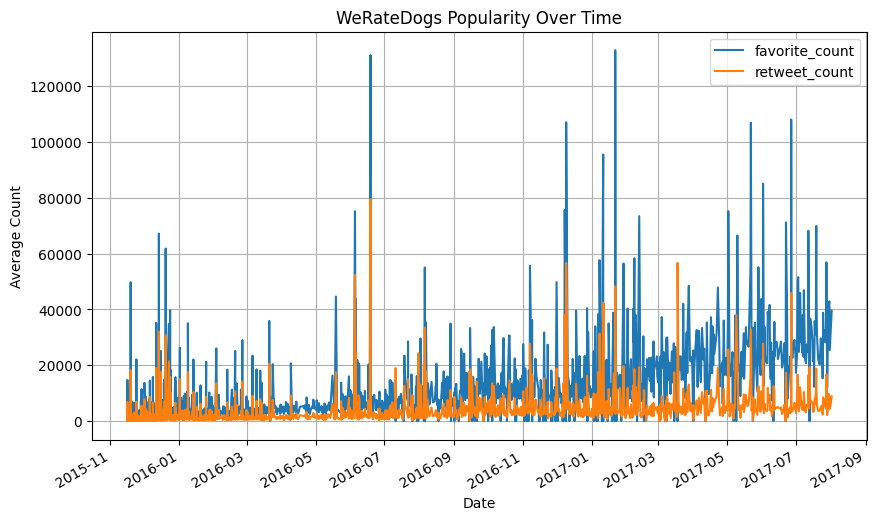

In [107]:
# Plot the data
popularity_over_time.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Average Count')
plt.title('WeRateDogs Popularity Over Time')
plt.grid(True)
plt.show()

**Conclusion**

- The WeRateDogs Twitter account experienced significant growth in user engagement from late 2015 to mid-2017. The increasing trends in both favorite and retweet counts reflect the rising popularity of the account. Peaks in the data indicate periods of particularly high engagement, possibly due to viral content or notable events. The consistently higher favorite counts compared to retweet counts align with typical Twitter user behavior.